# Project: Investigate a Dataset - People who didn't show up for medical appointents in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. 'ScheduledDay' - tells us on what day the patient set up their appointment.
2. 'Neighborhood' - indicates the location of the hospital.
3. 'Scholarship' - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. 'PatientId' - The ID of the patient - can work as a key.
5. 'AppointmentID' - The ID of the Appointment itself.
6. 'Gender' - Biological sex/gender of the patient/appointee.
7. 'AppointmentDay' - Shows the date of the appointment.
8. 'Age' - Age of the patients.
9. 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' - Columns to indicate if the patient has one of the indicated ailments. 1 is positive and 0 is negative.
10. 'SMS_received' - SHows if an SMS appointment reminder was received.
11. 'No-show' - Did the patient not come for appointment? Yes indicates the person did not show up, and No indicates they did.


### Question(s) for Analysis
#### The Dataset seeks to answer the following question (and it's follow up question):
* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [25]:
#Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### Loading the dataset, and initially viewing it and it's basic statistics. This should give an indication of the dataset properties and the operations that should be done on it. 

In [26]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Size of the Data Frame:

In [27]:
df.shape

(110527, 14)

#### Viewing summary statistics, and data types of the dataset's columns. This also allows seeing if the data has any missing values.

In [28]:
#Summary Statistics
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### From this summary, we can see that the minimum age is -1. This is unnaceptabe, hence we need to investigate this further. Viewing the column:

In [29]:
#Viewing the column whrere age is -1:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### This row can be safely deleted

In [30]:
df.drop(labels=[99832], axis=0, inplace=True)

In [54]:
# To view if changes were successful:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### Another area we need to look at is the Gender column.

In [55]:
#Viewing summary - Gender column:
df['Gender'].describe()

count     110526
unique         2
top            F
freq       71839
Name: Gender, dtype: object

As we can see from this, the Gender column is purely binary in nature, having only 2 unique values - M and F.

In [56]:
#Viewing basic information about the dataset's columns and data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  uint64             
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

##### Looking for dublicates in the data:

In [35]:
df.duplicated().sum()

0


### Data Cleaning
#### The data does not have duplicates, and it does not have null valures. 
#### However, we need to change datatypes:
   1. Date related columns from string to datetime.
   2. 'PatientId' column to unsigned int (uint64).

In [37]:
#Changing datatypes:

df['ScheduledDay'] = pd.to_datetime(df["ScheduledDay"])
df['AppointmentDay'] = pd.to_datetime(df["AppointmentDay"])
df = df.astype({'PatientId' : 'uint64'})

#### View Dataset summaries to make sure everything is as planned:

In [38]:
#Viewing dataset summaries
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
#Viewing summary:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  uint64             
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [42]:
#Viewing summary - Age column:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

#### As stated earlier, the key questions are:

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

We shall look at 3 independent variables (or causes):
   * Gender
   * Age
   * Neibhourhood
   
We will be checking if these variables correlate to the data in the 'No-show' column.

The number of people who showed up for appontments vs the number of people who did not:

In [43]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

As a pie chart:

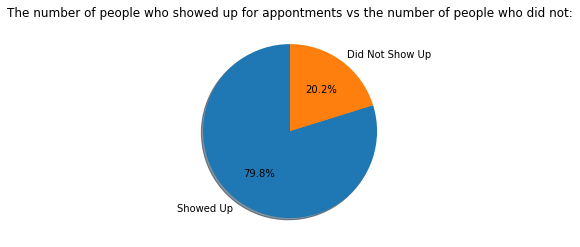

In [67]:
#Draw Pie Chart:
mpl.title('The number of people who showed up for appontments vs the number of people who did not:')
mpl.pie(df['No-show'].value_counts(), labels=['Showed Up', 'Did Not Show Up'], autopct='%1.1f%%',
        shadow=True, startangle=90);

### 1. Gender

First we look at the number of Females and the number of males in the dataset:

In [45]:
#Gender column frequency distribution:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

It also assists to see this visually:

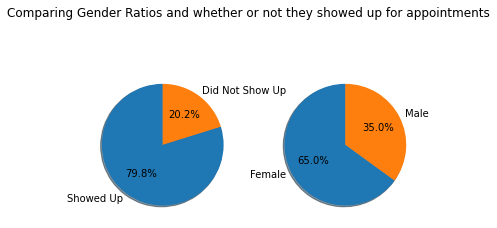

In [46]:
#Draw Pie Chart:
fig, (ax1, ax2) = mpl.subplots(1, 2)
fig.suptitle('Comparing Gender Ratios and whether or not they showed up for appointments')
ax1.pie(df['No-show'].value_counts(), labels=['Showed Up', 'Did Not Show Up'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%',
        shadow=True, startangle=90);

In [47]:
#Show labels
def show_labels(plot, x, y):
    plot.set_xlabel(x);
    plot.set_ylabel(y);

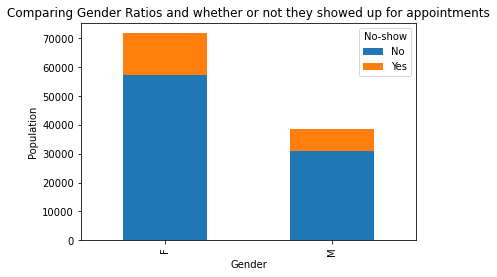

In [48]:
# Stacked bar graph:
ax = df.groupby(['Gender', 'No-show']).size().unstack().plot(kind='bar', stacked=True, title="Comparing Gender Ratios and whether or not they showed up for appointments");
show_labels(ax, 'Gender', 'Population')

This shows there are much more women than men in the database. The graphs above seem to show that, while there are more women than men, and also more people who showed up for medical appointments.

### 2. Age

Here we look at the Age column:

In [49]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Investigating corelation by drawing a stacked bar graph:

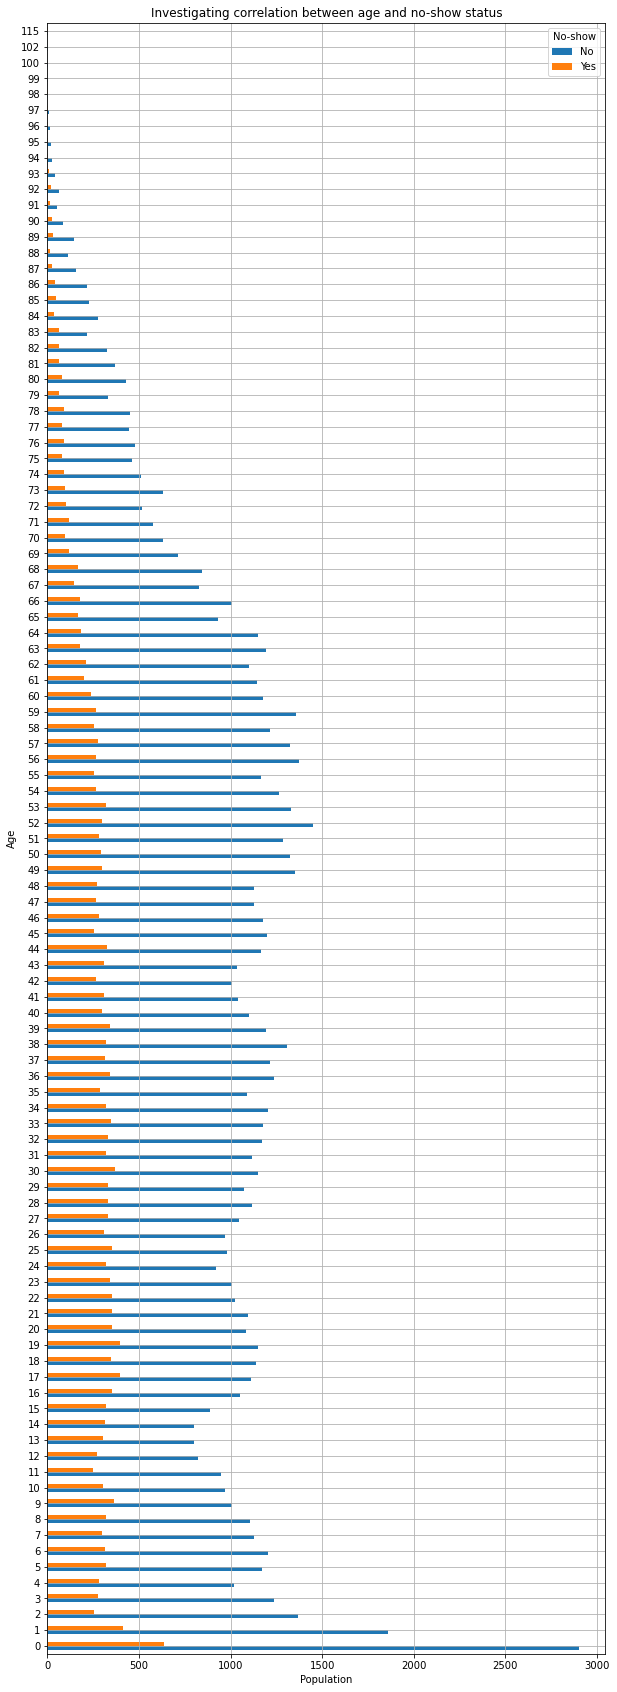

In [50]:
#Stacked Bar graph
ax = df.groupby(['Age', 'No-show']).size().unstack().plot(kind='barh', stacked=False, grid=True, figsize=(10, 30), title="Investigating correlation between age and no-show status");
show_labels(ax, 'Population', 'Age')

This graph seems to indicate that, fewer appointments are missed as age increases.

### 3. Neibourhood

First, we look at the Neibourhood column:



In [51]:
df['Neighbourhood'].describe()

count             110526
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

Then the Stacked bar graph:

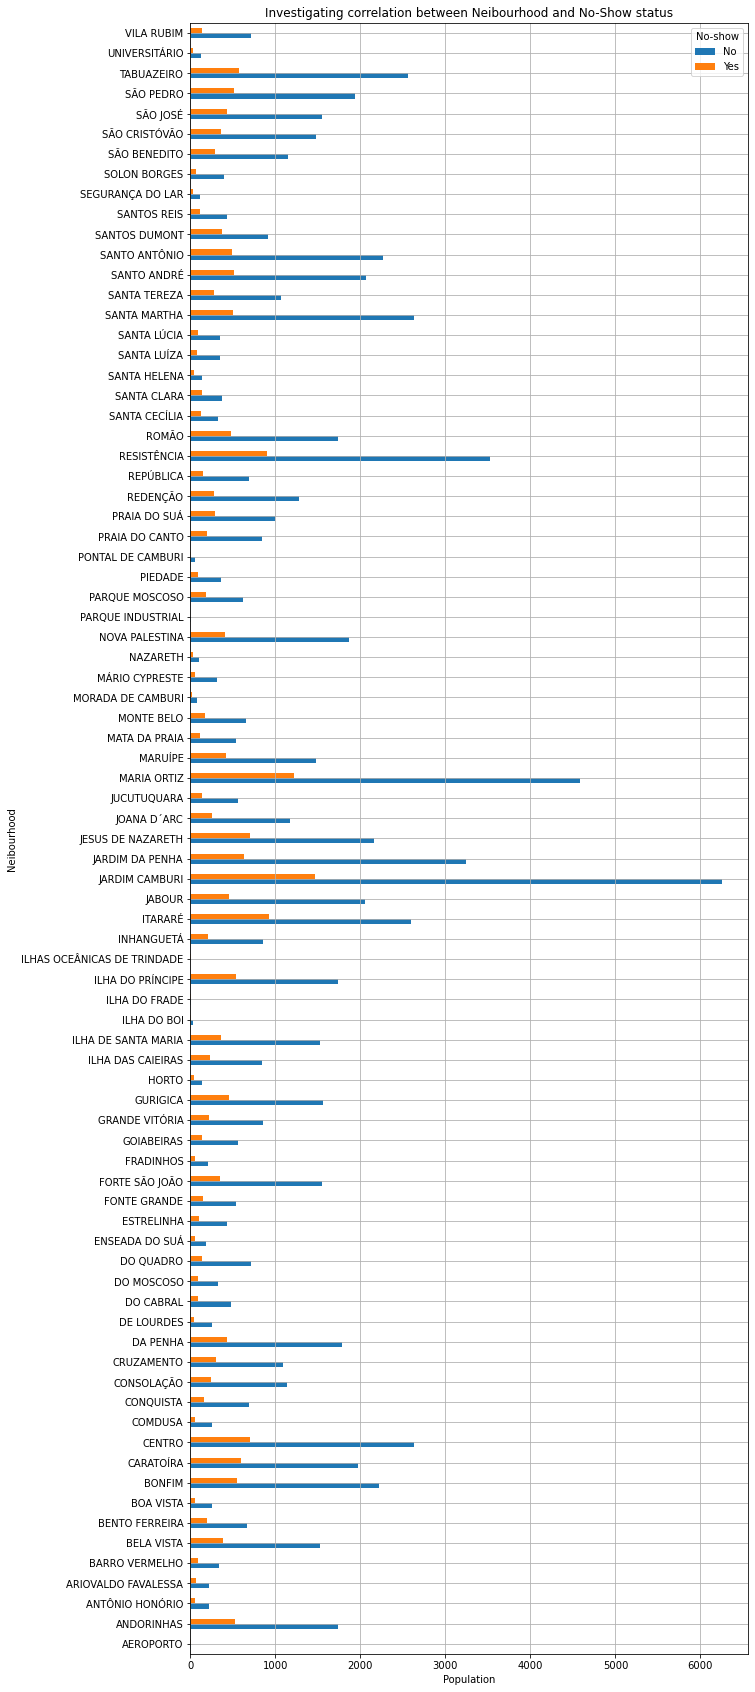

In [52]:
#Stacked bar graph:
ax = df.groupby(['Neighbourhood', 'No-show']).size().unstack().plot(kind='barh', stacked=False, figsize=(10,30), grid=True, title="Investigating correlation between Neibourhood and No-Show status");
show_labels(ax, 'Population', 'Neibourhood')

This graph seems to indicate that there is no direct relationship between the Neighbourhood and the appointments missed. Some Neighbourhood, like Maria Cruz, have a high rate of no shows, but this could be a result of them being frequent in the database.

<a id='conclusions'></a>
## Conclusions

#### 1. Age seems to have an effect on the rate of appointments missed. The higher the age, the more appointments are kept.
#### 2. Gender also has a relationship with the appointments
#### 3. Neighbourhood however, does not seem to have a direct relationship with the number of appointments kept or missed.

Statistical tests were not done, neither were any inferential methods used. Hence all conclusions were reached from observing the summary statistcs. Hence no statistical conclusions should be implied.

### Limitations
The results represented herein, however, are tentative and might not give a true picture of the actual realities on the ground. This is due to the following limitations:
1. The reseacher's own statistical knowledge is not comprehensive, hence the analysis might not be as accurate as can be.
2. Researcher's own understanding of visualisations is still in it's infancy, and hence visualisations could be better than they currently are.

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1